In [1]:
# 라이브러리 불러오기
import pandas as pd

In [2]:
# 데이터 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", sep="\t")

In [3]:
# 데이터 샘플
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [4]:
# 데이터 크기
df.shape

(150000, 3)

In [5]:
# 타겟 확인
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [6]:
# 결측치
df.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [7]:
# 결측치 삭제
print(df.shape)
df = df.dropna()
print(df.shape)

(150000, 3)
(149995, 3)


In [8]:
# 피처 엔지니어링 (문장의 길이)
df['len'] = df['document'].apply(len)
df.head()

,id,document,label,len
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33
2,10265843,너무재밓었다그래서보는것을추천한다,0,17
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61


<AxesSubplot:ylabel='Frequency'>

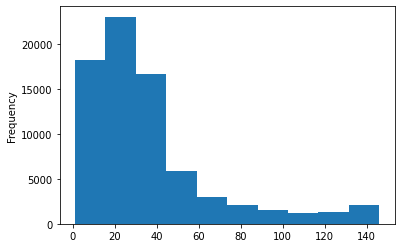

In [10]:
# len 시각화 (label == 0) 
import matplotlib.pyplot as plt
df[df.label==0]['len'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

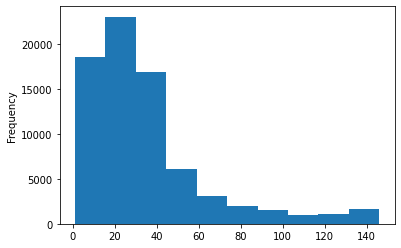

In [11]:
# len 시각화 (label == 1) 
df[df.label==1]['len'].plot(kind='hist')

In [ ]:
# 데이터 샘플링
df = df[:1000]

# CountVectorizer 내부 동작
 fit() 단계: 어휘 사전 생성.
입력 텍스트를 토큰화 후, 고유한 단어를 어휘 사전에 저장.

transform() 단계: 어휘 사전에 따라 텍스트를 벡터로 변환.
각 단어가 어휘 사전에 나타난 빈도를 기준으로 벡터를 생성

In [14]:
# 라이브러리 불러오기 (okt)
import konlpy
from konlpy.tag import Okt
tokenizer = Okt()

from sklearn.feature_extraction.text import CountVectorizer

# 토큰화/ 벡터화
vect = CountVectorizer(tokenizer=tokenizer.morphs)
vectors = vect.fit_transform(df['document'])
vectors.shape

(1000, 4767)

In [15]:
# 머신러닝
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier(random_state=2022)
cross_val_score(model, vectors, df['label'], scoring='f1', cv=5).mean()

0.6634352457852256